In [53]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
from sklearn.linear_model import LinearRegression
import math
from scipy.optimize import curve_fit

In [54]:
loaded_node_temp= pd.read_pickle(Dict_temp_1_5)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_1_5)

#df.head()

In [55]:
#loaded_node_temp.keys()

In [56]:
temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 5:  # Make sure the list has at least 2 elements
        temperature .append(loaded_node_temp[key][2])

print(temperature )


[25.0008, 25.004, 25.0104, 25.021, 25.0365, 25.0575, 25.0843, 25.1172, 25.1559, 25.2004, 25.25, 25.3043, 25.3622, 25.423, 25.4855, 25.5487, 25.6114, 25.6726, 25.731, 25.7859, 25.8364, 25.8817, 25.9214, 25.9552, 25.983, 26.005, 26.0214, 26.0328, 26.0398, 26.0435, 26.0446, 26.0444, 26.0439, 26.0442, 26.0465, 26.0518, 26.0609, 26.0748, 26.0939, 26.1188, 26.1496, 26.1864, 26.229, 26.277, 26.3298, 26.3866, 26.4465, 26.5086, 26.5717, 26.6347, 26.6965, 26.7559, 26.8121, 26.8641, 26.9112, 26.9529, 26.9887, 27.0185, 27.0423, 27.0605, 27.0735, 27.0819, 27.0866, 27.0885, 27.0886, 27.0881, 27.088, 27.0895, 27.0936, 27.1014, 27.1136, 27.1309, 27.1538, 27.1827, 27.2175, 27.2582, 27.3044, 27.3557, 27.4113, 27.4703, 27.5318, 27.5946, 27.6578, 27.7201, 27.7804, 27.8378, 27.8913, 27.9401, 27.9836, 28.0214, 28.0532, 28.079, 28.0991, 28.1137, 28.1236, 28.1294, 28.1321, 28.1327, 28.1323, 28.1319, 28.1328, 28.1359, 28.1424, 28.153, 28.1686, 28.1896, 28.2164, 28.2492, 28.288, 28.3325, 28.3821, 28.4363, 28.49

In [57]:

time = list(loaded_node_temp.keys())

Fitted 'a' coefficient: 25.033736189904555
Fitted 'b' coefficient: 1.5660292095290298


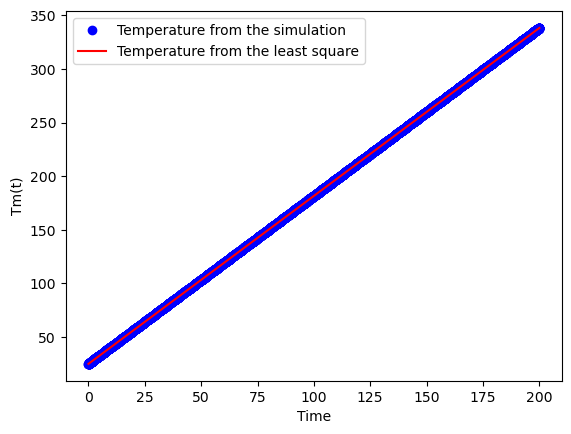

In [58]:
# Define the function Tm(t) = a + bt + ∑∆Tn cos(nωt + ϕn) for n = 1, 3, 5, 7
def tm_function(t, a, b, *params):
    result = a + b * t
    num_terms = len(params) // 2  # Since each term has both ∆Tn and ϕn
    for n in range(1, num_terms + 1):
        delta_Tn = params[2*n - 2]
        phi_n = params[2*n - 1]
        result += delta_Tn * np.cos(n * omega * t + phi_n)
        
    return result


time= np.array(time)

# Initial guess for parameters
initial_guess = [1.0, 1.0] + [0.0, 0.0, 0.0, 0.0]  # [a, b, ∆T1, ϕ1, ∆T3, ϕ3, ∆T5, ϕ5, ∆T7, ϕ7]

# Angular frequency
omega = 2 * np.pi*0.182

# Perform the curve fitting
popt, _ = curve_fit(tm_function, time, temperature, p0=initial_guess)


a_fit = popt[0]
b_fit = popt[1]

print("Fitted 'a' coefficient:", a_fit)
print("Fitted 'b' coefficient:", b_fit)

# Generate fitted curve using the fitted coefficients
fitted_curve = tm_function(time, *popt)


plt.plot(time, temperature, 'bo', label='Temperature from the simulation')
plt.plot(time, fitted_curve, 'r-', label='Temperature from the least square')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()


In [59]:
popt

array([ 2.50337362e+01,  1.56602921e+00, -3.27898039e-04,  3.56200623e-01,
       -2.10506037e-04, -8.56016122e-01])

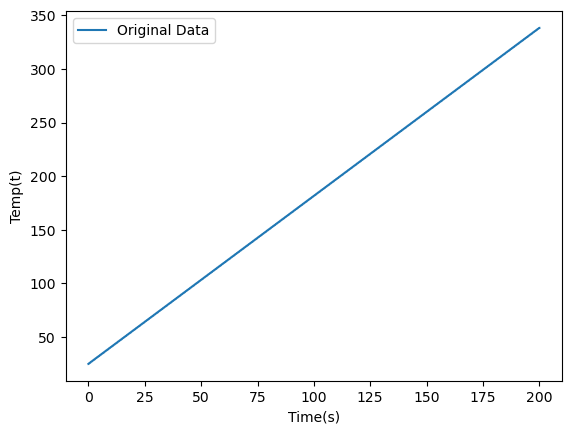

In [60]:
new_node_temperature =[]
# Using a loop
for key in loaded_node_temp:
    if len(loaded_node_temp[key]) >= 10:  
        new_node_temperature.append(loaded_node_temp[key][4])

plt.plot(time, new_node_temperature,  label='Original Data')
#plt.plot(time,  fitted_curve, 'r-', label='Fitted Curve')
plt.xlabel('Time(s)')
plt.ylabel('Temp(t)')
plt.legend()
plt.show()

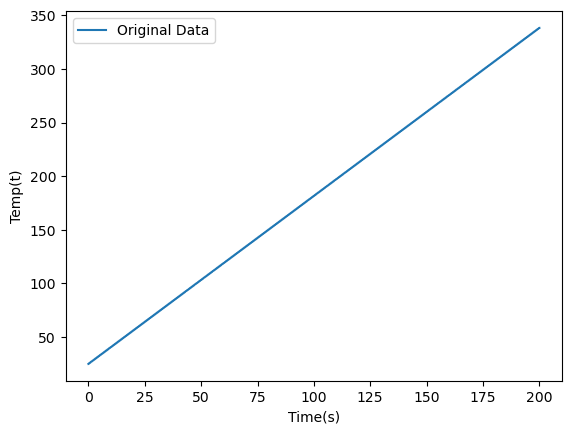

In [61]:

for i in range(1,len(loaded_node_temp)):
    new_node_temperature =[]
    for  key in loaded_node_temp:
        
        new_node_temperature.append(loaded_node_temp[key][i])

    plt.plot(time, new_node_temperature,  label='Original Data')
        #plt.plot(time,  fitted_curve, 'r-', label='Fitted Curve')
    plt.xlabel('Time(s)')
    plt.ylabel('Temp(t)')
    plt.legend()
    plt.show()
    break

In [62]:
len(loaded_node_temp)

10000

In [63]:
new_node_temperature

[25.0008,
 25.0039,
 25.0104,
 25.021,
 25.0367,
 25.0578,
 25.0849,
 25.1181,
 25.1572,
 25.202,
 25.2521,
 25.3068,
 25.3652,
 25.4264,
 25.4894,
 25.5529,
 25.6159,
 25.6773,
 25.7359,
 25.7909,
 25.8413,
 25.8866,
 25.9261,
 25.9597,
 25.9872,
 26.0088,
 26.0248,
 26.0357,
 26.0424,
 26.0456,
 26.0463,
 26.0457,
 26.0448,
 26.0449,
 26.0469,
 26.0521,
 26.0612,
 26.075,
 26.0943,
 26.1193,
 26.1504,
 26.1876,
 26.2306,
 26.279,
 26.3322,
 26.3894,
 26.4498,
 26.5123,
 26.5758,
 26.6391,
 26.7011,
 26.7608,
 26.8171,
 26.8691,
 26.9161,
 26.9576,
 26.9932,
 27.0227,
 27.0463,
 27.0641,
 27.0766,
 27.0846,
 27.0888,
 27.0903,
 27.09,
 27.0891,
 27.0887,
 27.09,
 27.094,
 27.1016,
 27.1138,
 27.1312,
 27.1543,
 27.1834,
 27.2185,
 27.2596,
 27.3063,
 27.358,
 27.414,
 27.4734,
 27.5353,
 27.5986,
 27.6621,
 27.7247,
 27.7852,
 27.8428,
 27.8963,
 27.9451,
 27.9885,
 28.026,
 28.0576,
 28.0831,
 28.1028,
 28.117,
 28.1264,
 28.1318,
 28.1341,
 28.1342,
 28.1334,
 28.1327,
 28.1333,
 28

In [64]:
Error= abs((temperature- fitted_curve)/temperature)

In [65]:
np.mean(Error)*100

0.08963527503152033

In [66]:
#0∘=∑𝑡sin(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡),
(1)
#90∘=∑𝑡cos(2𝜋𝜔𝑡+3𝜋2)∗𝑇(𝑡).
# https://www.mdpi.com/2076-3417/13/7/4094
#https://www.sciencedirect.com/science/article/abs/pii/S0026271410003550

1